In [1]:
import sys

sys.path.append("..")

In [2]:
import open3d as o3d
import numpy as np
import seaborn as sns
import pandas as pd

import re

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools

from itertools import combinations_with_replacement
from open3d.web_visualizer import draw

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


INFO - 2021-06-30 10:06:32,471 - __init__ - Enabling RDKit 2021.03.3 jupyter extensions


[Open3D INFO] Resetting default logger to print to terminal.


In [3]:
from score_pcd import fit_and_score

In [4]:
path = "ligands/CDK2"
files = [os.path.join(path, f) for f in os.listdir(path) if os.path.splitext(f)[-1] == ".pcd"]

# Order ligands
# This should make the three chemical series pop-up in the PCD fit
names = {
    "4ek4_B_1CK": "CS1",
    "4ek5_B_03K": "CS3",
    "4fkg_B_4CK": "CS4",
    "4fki_B_09K": "CS9",
    "4fkj_B_11K": "CS11",
    "3sw4_B_18K": "CS18",
    "3sw7_B_19K": "CS19",
    "4fko_B_20K": "CS20",
    "4fkp_B_LS5": "CS241",
    "4fkq_B_42K": "CS242",
    "4fkr_B_45K": "CS245",
    "4fks_B_46K": "CS246",
    "4fkt_B_48K": "CS248",
    "4fku_D_60K": "CS260",
    "4fkv_B_61K": "CS261",
    "4fkw_B_62K": "CS262",
}

files.sort(key=lambda f: int(names[os.path.splitext(os.path.basename(f))[0]].replace("CS", "")))

print(files)


pcds = []
mols = []
for f in files:
    pcd = o3d.io.read_point_cloud(f)
    pcds.append(pcd)

    s = Chem.SDMolSupplier(f.replace(".pcd", ".sdf"))
    mol = next(s)
    AllChem.Compute2DCoords(mol)
    mols.append(mol)

['ligands/CDK2/4ek4_B_1CK.pcd', 'ligands/CDK2/4ek5_B_03K.pcd', 'ligands/CDK2/4fkg_B_4CK.pcd', 'ligands/CDK2/4fki_B_09K.pcd', 'ligands/CDK2/4fkj_B_11K.pcd', 'ligands/CDK2/3sw4_B_18K.pcd', 'ligands/CDK2/3sw7_B_19K.pcd', 'ligands/CDK2/4fko_B_20K.pcd', 'ligands/CDK2/4fkp_B_LS5.pcd', 'ligands/CDK2/4fkq_B_42K.pcd', 'ligands/CDK2/4fkr_B_45K.pcd', 'ligands/CDK2/4fks_B_46K.pcd', 'ligands/CDK2/4fkt_B_48K.pcd', 'ligands/CDK2/4fku_D_60K.pcd', 'ligands/CDK2/4fkv_B_61K.pcd', 'ligands/CDK2/4fkw_B_62K.pcd']


In [5]:
# Score is not symmetric because RANSAC is currently not deterministic
# See https://github.com/intel-isl/Open3D/issues/1263
# Would the score be symmetric if this was not the case?
n = len(pcds)
Sfitness = np.zeros((n,n))

for i, pcd1 in enumerate(pcds):
    for j, pcd2 in enumerate(pcds):
        gfit, cfit = fit_and_score((pcd1, pcd2), voxel_size=0.5, threshold=0.5)
        Sfitness[i, j] = cfit.fitness

In [6]:
#mask = np.zeros_like(fitness)
#mask[np.triu_indices_from(mask, k=1)] = True
#ax = sns.heatmap(fitness, mask=mask, cmap="YlGnBu")

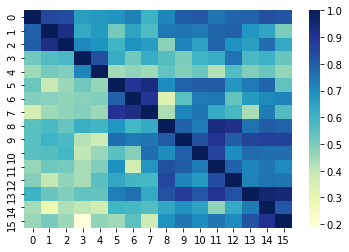

In [7]:
ax = sns.heatmap(Sfitness, cmap="YlGnBu")

In [8]:
df =pd.DataFrame(Sfitness, columns=mols, index=mols)

,,,,,,,,,,,,,,,,
,1.000000,0.851327,0.842478,0.658407,0.670796,0.684956,0.727434,0.601770,0.716814,0.800000,0.812389,0.750442,0.778761,0.787611,0.830088,0.815929
,0.792822,1.000000,0.923328,0.631321,0.667210,0.510604,0.644372,0.572594,0.745514,0.755302,0.740620,0.781403,0.792822,0.680261,0.637847,0.497553
,0.799003,0.926910,1.000000,0.710963,0.686047,0.596346,0.689369,0.664452,0.478405,0.717608,0.647841,0.785714,0.691030,0.656146,0.762458,0.631229
,0.513928,0.566852,0.577994,1.000000,0.830084,0.619777,0.515320,0.621170,0.564067,0.497214,0.598886,0.618384,0.753482,0.579387,0.605850,0.527855
,0.448956,0.508121,0.489559,0.714617,1.000000,0.440835,0.467517,0.450116,0.540603,0.487239,0.525522,0.417633,0.566125,0.487239,0.527842,0.462877
,0.524970,0.388551,0.453106,0.520097,0.460414,1.000000,0.897686,0.935445,0.704019,0.789281,0.801462,0.800244,0.677223,0.739342,0.778319,0.542022
,0.488445,0.476891,0.468487,0.476891,0.490546,0.793067,1.000000,0.894958,0.332983,0.546218,0.740546,0.744748,0.535714,0.669118,0.706933,0.722689
,0.354095,0.449827,0.471742,0.483276,0.452134,0.897347,0.926182,1.000000,0.430219,0.719723,0.752018,0.626298,0.582468,0.437140,0.733564,0.565167
,0.551925,0.576429,0.532089,0.613769,0.591599,0.681447,0.588098,0.626604,1.000000,0.791132,0.737456,0.939323,0.914819,0.756126,0.801634,0.788798
,0.557971,0.599034,0.578502,0.417874,0.376812,0.764493,0.739130,0.748792,0.804348,1.000000,0.828502,0.900966,0.793478,0.862319,0.869565,0.865942

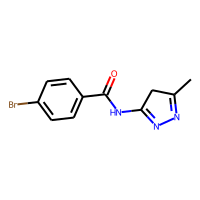
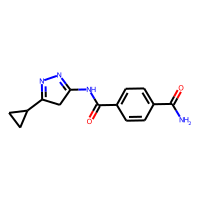
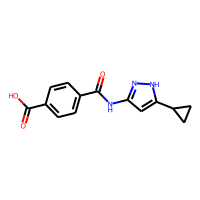
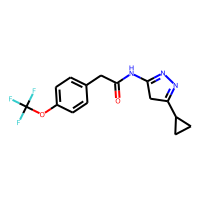
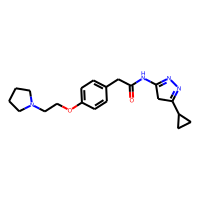
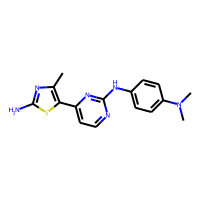
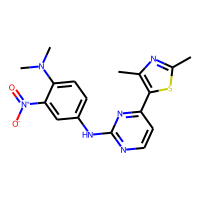
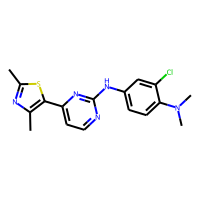
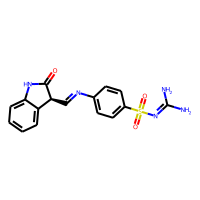
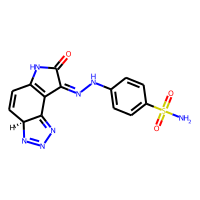
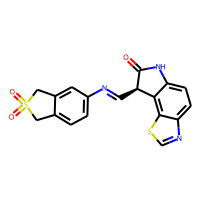
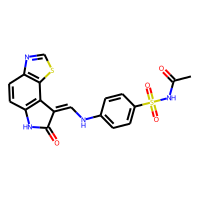
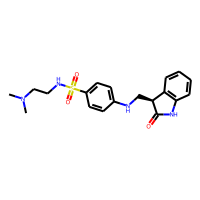
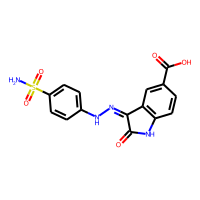
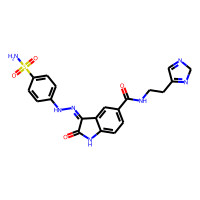
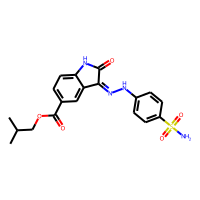
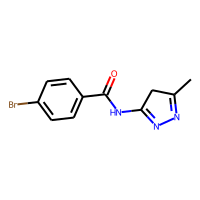
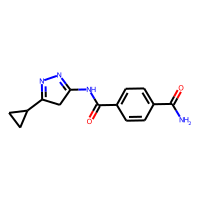
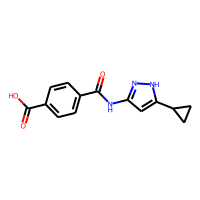
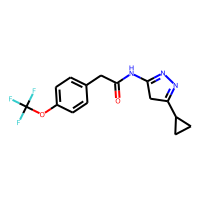
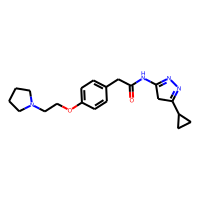
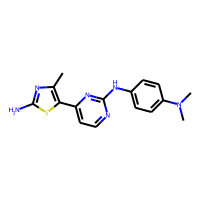
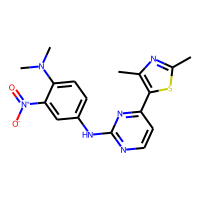
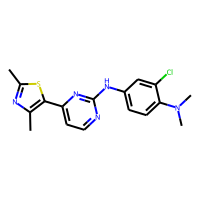
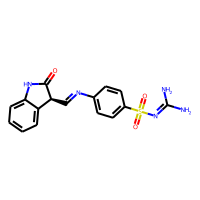
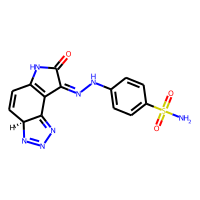
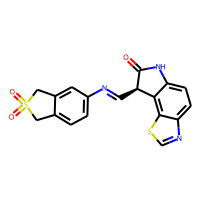
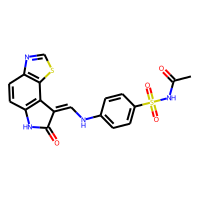
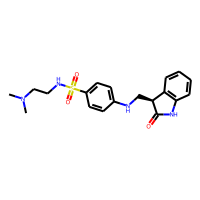
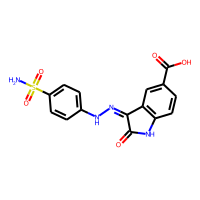
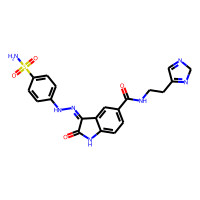
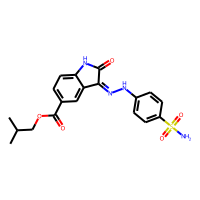

In [9]:
from IPython.display import HTML

PandasTools.ChangeMoleculeRendering(df, renderer="SVG")
df.style.background_gradient(cmap=sns.cm.rocket)

In [10]:
draw(pcds[-1])

WebVisualizer(window_uid='window_0')